In [1]:
from matplotlib import pyplot as plt
import seaborn as sns
import os
import numpy as np

In [2]:
path = "results/"
results = {}
# go through each folder and load all results '.npy' files
for folder in os.listdir(path):
    results[folder] = {}
    for file in os.listdir(path + folder):
        results[folder][file[:-4]] = np.load(path + folder + "/" + file)

----------------------------------------
Analysing metric: CF_distance
Analysing 4 methods


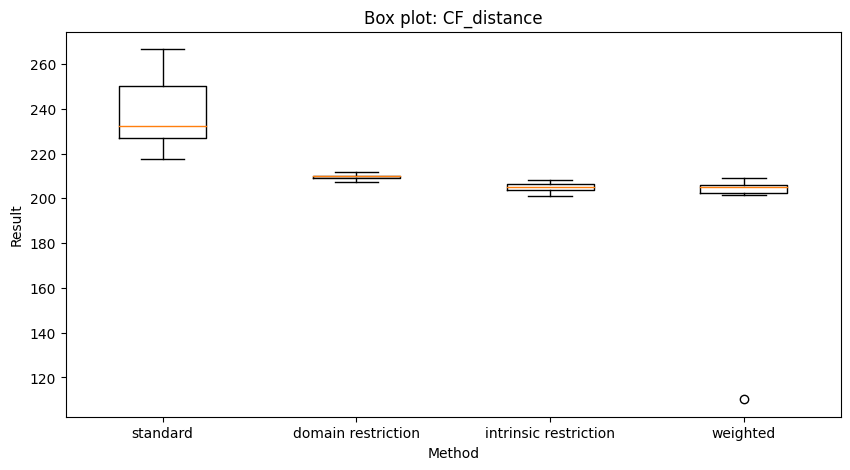

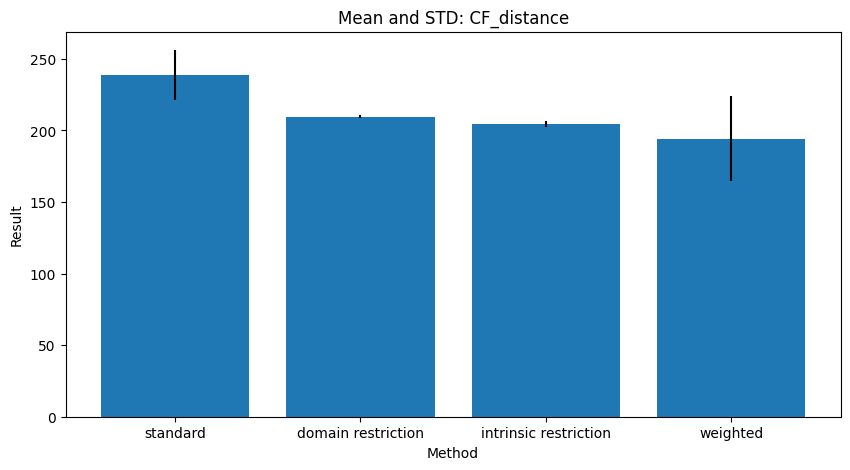

Average and standard deviation of each method:
standard : 238.686 17.52008811917635
domain restriction : 209.62626262626264 1.1957120614702867
intrinsic restriction : 204.77253968253964 2.062013340738785
weighted : 194.30925925925922 29.80987898412221
----------------------------------------
Analysing metric: CF_distance_weighted
Analysing 4 methods


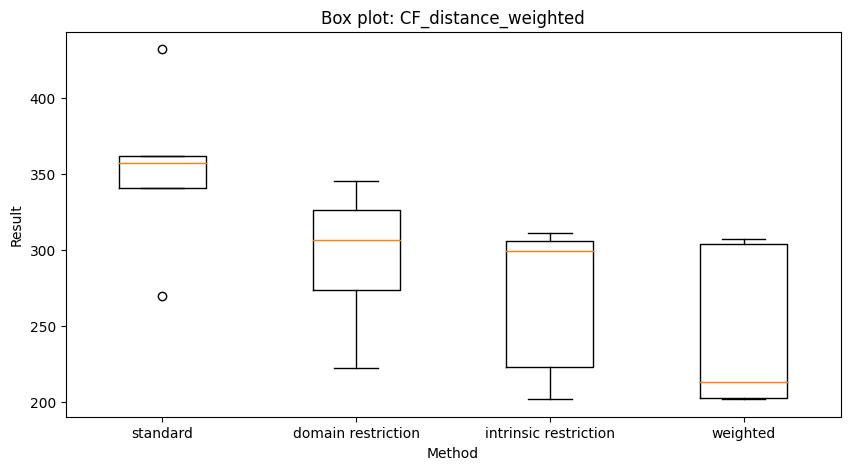

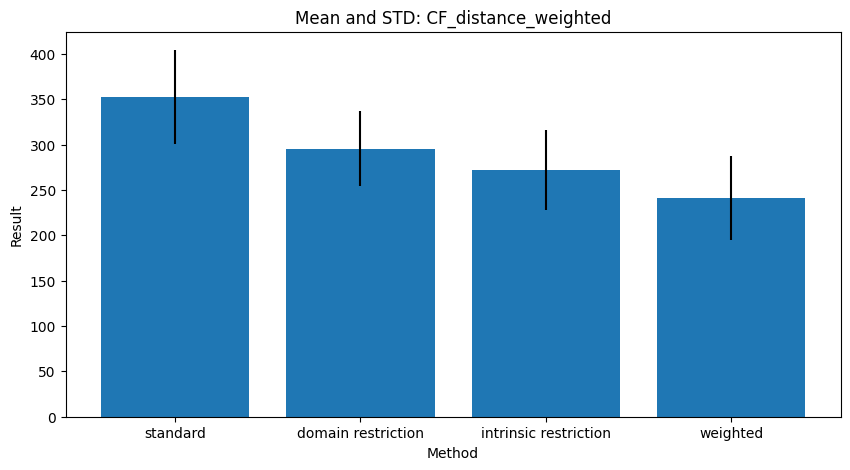

Average and standard deviation of each method:
standard : 352.3606521064757 51.94775884762533
domain restriction : 295.7014914381627 41.708729055072595
intrinsic restriction : 272.199218059846 43.76327126055452
weighted : 240.66005723165966 46.285020641211936
----------------------------------------
Analysing metric: misfit
Analysing 4 methods


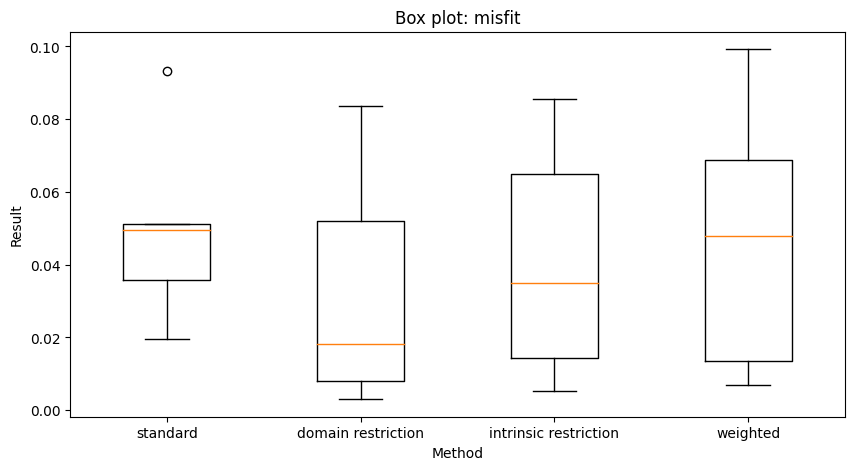

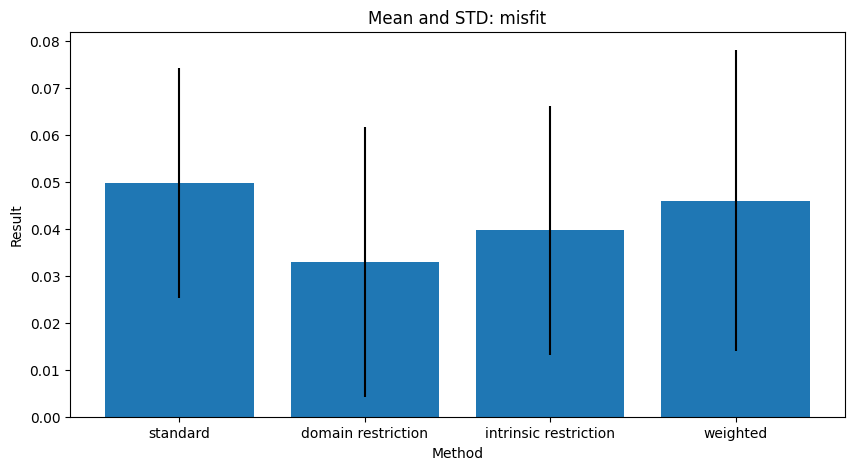

Average and standard deviation of each method:
standard : 0.0498460330812424 0.024483320828291147
domain restriction : 0.03295441352109591 0.02865670683511219
intrinsic restriction : 0.039690123899620774 0.026505644704053404
weighted : 0.046002573547630675 0.03209835209387635
----------------------------------------
Analysing metric: sparsity
Analysing 4 methods


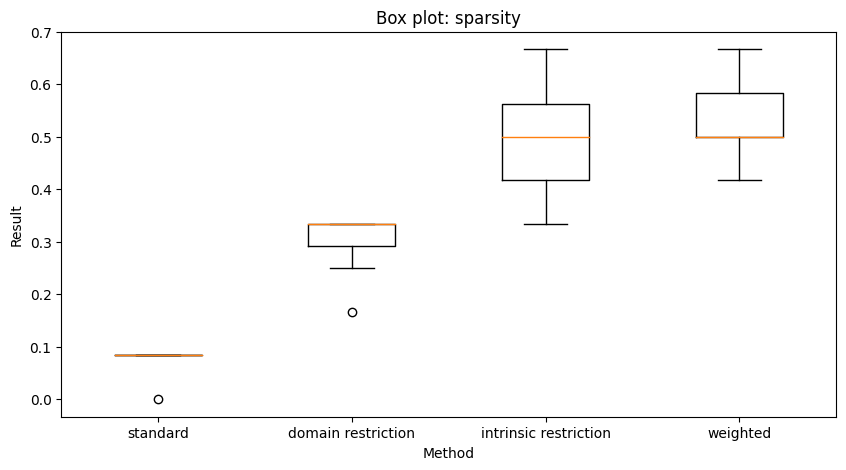

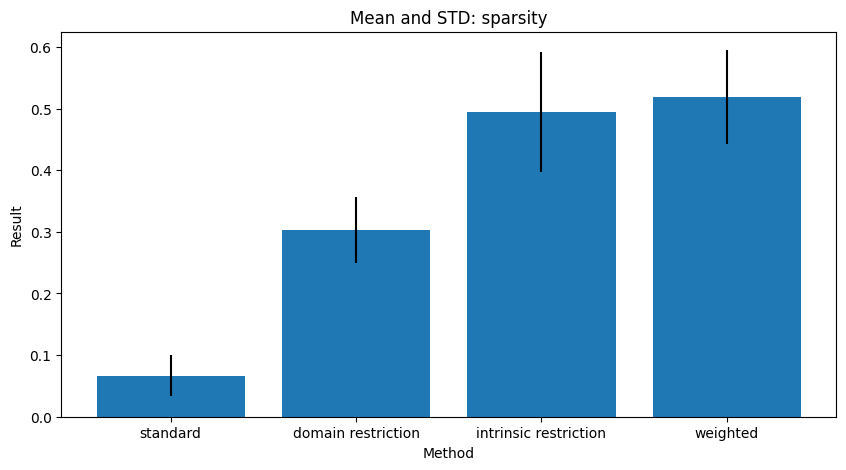

Average and standard deviation of each method:
standard : 0.06666666666666667 0.03333333333333333
domain restriction : 0.30303030303030304 0.053568695544435406
intrinsic restriction : 0.494047619047619 0.09689774164345064
weighted : 0.5185185185185186 0.07635380788180852


In [4]:
# each key in results represents a metric, analyse each one with same code
def analyse_metric(data, name):
    # Define custom order
    custom_order = ["standard", "domain restriction", "intrinsic restriction", "weighted"]

    # Sort the dictionary keys based on the custom order
    sorted_keys = sorted(data.keys(), key=lambda x: custom_order.index(x))

    # count how many methods that was used
    methods = len(data)
    print(f"Analysing {methods} methods")

    # box plot each method
    plt.figure(figsize=(10, 5))
    plt.title("Box plot: " + name)
    plt.xlabel("Method")
    plt.ylabel("Result")
    plt.boxplot([data[key] for key in sorted_keys])
    plt.xticks(range(1, methods + 1), sorted_keys)
    plt.show()

    # plot average and standard deviation of each method
    plt.figure(figsize=(10, 5))
    plt.title("Mean and STD: " + name)
    plt.xlabel("Method")
    plt.ylabel("Result")
    plt.bar(range(1, methods + 1), [np.mean(data[key]) for key in sorted_keys], yerr=[np.std(data[key]) for key in sorted_keys])
    plt.xticks(range(1, methods + 1), sorted_keys)
    plt.show()

    # print average and standard deviation of each method
    print("Average and standard deviation of each method:")
    for key in sorted_keys:
        print(key, ":", np.mean(data[key]), np.std(data[key]))


# analyse each metric
for key, value in results.items():
    print("-"*40)
    print("Analysing metric:", key)
    analyse_metric(value, key)